## Die Studentsche-t-Verteilung in Python
----------------------------------------

In [1]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Python ermöglicht den Zugriff auf die $t$-Verteilung mit den Funktionen `t.pdf()`, `t.cdf()`, `t.ppf()` und `t.rvs()`. Wenden Sie die Funktion `dir()` auf diese Funktionen an, um weitere Informationen zu erhalten.

Die Funktion `t.rvs()` erzeugt Zufallsabweichungen der $t$-Verteilung und wird als`t.rvs(df, loc , scale, size)` geschrieben. Wir können leicht eine Anzahl von $n$ Zufallsstichproben erzeugen. Erinnern Sie sich daran, dass die Anzahl der Freiheitsgrade für eine $t$-Verteilung gleich dem Stichprobenumfang minus eins ist, d.h.,


$$df = n - 1\text{.}$$

In [2]:
#generate random values from t distribution with df=6 and sample size=10
t.rvs(df=29, size=30)

array([ 1.47973814e+00, -1.61568695e+00, -1.56101982e+00, -1.42116901e+00,
        1.61868931e-01,  5.79611575e-01,  2.93265421e+00,  1.87912901e+00,
        3.83229342e-01,  1.90972531e-01, -1.14689161e+00,  1.64042496e-01,
        4.75477471e-01,  2.35468855e+00, -8.00030861e-01,  1.47259384e+00,
        8.73636775e-01, -2.60212103e-03,  4.04876918e-01, -7.44608299e-01,
       -1.70740089e+00,  8.32183871e-01,  3.26339526e-01, -1.30840518e+00,
        5.02712839e-01, -1.05970872e+00, -4.74603111e-01,  5.32118359e-02,
       -9.08132064e-01, -6.92944760e-01])

Außerdem können wir eine sehr große Anzahl von Stichproben erzeugen und sie als Histogramm darstellen.


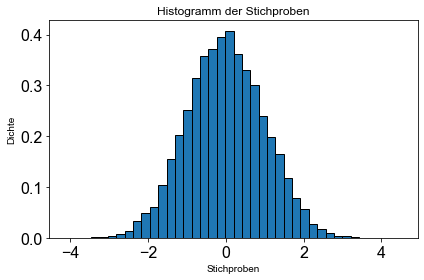

In [3]:
# Erzeuge zufallwerte der t distribution mit df=9999 und sample size=10000
y = t.rvs(df=9999, size=10000)

fig, ax1 = plt.subplots()

ax1.set_title('Histogramm der Stichproben')
ax1.set_xlabel('Stichproben')
ax1.set_ylabel('Dichte')
ax1.hist(y,bins=40,density = True, edgecolor='k')

fig.tight_layout()

plt.show() 

Mit der Funktion `t.pdf()` können wir die Wahrscheinlichkeitsdichtefunktion und damit den vertikalen Abstand zwischen der horizontalen Achse und der $t$-Kurve an jedem beliebigen Punkt berechnen. Zur Demonstration konstruieren wir eine $t$-Verteilung mit $df=5$ und berechnen die Wahrscheinlichkeitsdichtefunktion bei $t=-4,-2,0,2,4$.

In [4]:
x = list(range(-4,5,2))
y_t = t.pdf(x,df = 5)

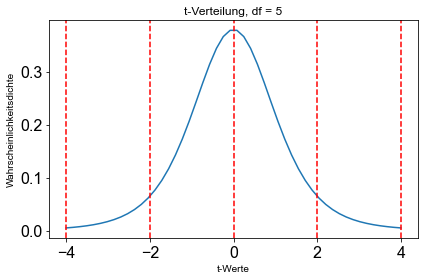

In [5]:
# Erzeuge x-werte
x = np.linspace(-4,4,num = 50)

# Plotte t-Verteilung
fig, ax1 = plt.subplots()

ax1.set_title('t-Verteilung, df = 5')
ax1.set_xlabel('t-Werte')
ax1.set_ylabel('Wahrscheinlichkeitsdichte')
ax1.plot(x,t.pdf(x,df = 5))
ax1.axvline(x=0, color='r', ls = '--',label='Erwartungswert : 0')
ax1.axvline(x=2, color='r', ls = '--',label='Erwartungswert : 0')
ax1.axvline(x=-2, color='r', ls = '--',label='Erwartungswert : 0')
ax1.axvline(x=4, color='r', ls = '--',label='Erwartungswert : 0')
ax1.axvline(x=-4, color='r', ls = '--',label='Erwartungswert : 0')
fig.tight_layout()

plt.show() 

Eine weitere sehr nützliche Funktion ist die Funktion `t.cdf()`, die die Fläche unter der $t$-Kurve für ein beliebiges Intervall liefert. Berechnen wir die Fläche unter der Kurve für die Intervalle $j_i= \ ]-\infty \ $,$ \ -2]$ , $]-\infty \ $,$ \ 0]$ , $]-\infty \ $,$ \ 2]$ und $k_i=[-2 \ $,$ \ \infty[$ , $[0 \ $,$ \ \infty[$ , $[2 \ $,$ \ \infty[$ für eine Zufallsvariable mit einer $t$-Verteilung mit $df=5$.

In [41]:
x_ppf_left=[]
# Berechne kumulitative Wahrscheinlichkeit links von Wert x
for i in range(-2,3,2):
    x_ppf_left.append(t.cdf(i, df = 5))
    print(t.cdf(i, df = 5),'Wert für Fläche links von :',i)

0.05096973941492914 Wert für Fläche links von : -2
0.5 Wert für Fläche links von : 0
0.9490302605850709 Wert für Fläche links von : 2


![Alt-Text](tdist2.png)

In [39]:
x_ppf_right=[]
# Berechne kumulitative Wahrscheinlichkeit rechts von Wert x
for i in range(-2,3,2):
    x_ppf_right.append(1-t.cdf(i, df = 5))
    print(1-t.cdf(i, df = 5),'Wert für Fläche rechts von :',i)

0.9490302605850709 Wert für Fläche rechts von : -2
0.5 Wert für Fläche rechts von : 0
0.050969739414929105 Wert für Fläche rechts von : 2


![Alt-Text](tdist3.png)

Die Funktion `t.ppf()` liefert die Quantilfunktion und ist damit die Umkehrfunktion von `t.cdf()`. Für die Intervalle $j_i= ]-\infty \ $,$ \ -2]$ , $]-\infty \ $,$ \ 0]$ , $]-\infty \ $,$ \ 2]$ einer Zufallsvariablen, die einer $t$-Verteilung mit $df=5$ folgt, liefert die Funktion `t.ppf()`...

In [46]:
t_ppf=[]
for x in x_ppf_left:
    t_ppf.append(t.ppf(x, df = 5))
# Runde Ergebnis
t_ppf = [round(y) for y in t_ppf]
t_ppf

[-2, 0, 2]

... und für die Intervalle $k_i=[-2 \ $,$ \ \infty[$ , $[0 \ $,$ \ \infty[$ , $[2 \ $,$ \ \infty[$ einer Zufallsvariablen, die einer $t$-Verteilung mit $df=5$ folgt, liefert die Funktion `t.ppf`

In [45]:
t_ppf=[]
for x in x_ppf_right:
    t_ppf.append(t.ppf(1-x, df = 5))
# Runde Ergebnis
t_ppf = [round(y) for y in t_ppf]
t_ppf

[-2, 0, 2]